# Import Library yang dibutuhkan

Disini, kami menggunakan library matplotlib.pyplot as plt untuk menjawab hipotesis yang ke 2 dan 3 yaitu eksplorasi menggunakan visualisasi matplotlib. Kami juga menggunakan train_test_split untuk memisah data test dan data training.

In [ ]:
# Utils
import pandas as pd # Dataframe
import numpy as np
import math

# Model related
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # Ensemble
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Visualisasi
from sklearn import tree # Visualisasi Decision Tree
import matplotlib.pyplot as plt

# Upload Dataset

Dataset Rain in Australia berisi tentang pengamatan cuaca harian pada daerah - daerah di seluruh Australia yang berisi 145460.

Dataset ini memiliki variabel target yaitu RainTomorow yaitu prediksi hujan pada esok hari

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
df = pd.read_csv("weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data Preprocessing

Inisiasi variable target yaitu RainTomorrow.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["RainTomorrow"] = [1 if each == "Yes" else 0 for each in df["RainTomorrow"]]
df["RainToday"] = [1 if each == "Yes" else 0 for each in df["RainToday"]]

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.219167,0.219146
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,1.000000


Mengubah data kategorikal menjadi data numerikal dengan menggunakan cat codes.

In [ ]:
cat_cols = []
num_cols = []
other_cols = []

for each in df.columns:
    if df[each].dtype == "object":
        cat_cols.append(each)
    elif df[each].dtype == "float64":
        num_cols.append(each)
    else:
        other_cols.append(each)
print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)
print("Other Columns: ",other_cols)

Categorical Columns:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Numerical Columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Other Columns:  ['Date', 'RainToday', 'RainTomorrow']


Mencari missing value

In [ ]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Berikut ini merupakan missing values

In [ ]:
missing_values_table(df)


,Missing Values,% of Total Values
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4
Pressure3pm,15028,10.3
WindDir9am,10566,7.3
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
Humidity3pm,4507,3.1


# Eksplorasi

Ekslorasi : 
2) Daerah apa yang memiliki prediksi rainTomorrow yang tertinggi?
3) Arah tiupan yang paling berpengaruh terhadap prediksi rainTomorrow?

Disini kami menggunakan bar plot dan sub plot untuk visualisasi daerah yang tertinggi dan arah tiupan

In [ ]:
def ctgplt(variable,to):
    
    "Function for visualization of categorical variables."
    
    var = df[variable]
    values=var.value_counts()
    
    f, ax = plt.subplots(figsize = (8,8))
    g = sns.barplot(x = variable, y = to, data = df)
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()
    
    print("{}:\n{}".format(variable,values))

def numplt(data,variable,to):
  
  "Function for visualization of numerical variables."

  c = sns.FacetGrid(data,col=to,height=6)
  c.map(sns.distplot,variable,bins=25)
  plt.show()

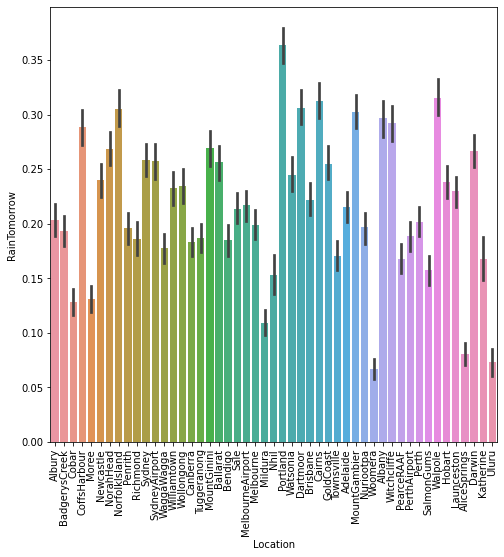

Location:
Canberra            3436
Sydney              3344
Brisbane            3193
Adelaide            3193
Perth               3193
Melbourne           3193
Hobart              3193
Darwin              3193
Townsville          3040
AliceSprings        3040
Wollongong          3040
Ballarat            3040
Launceston          3040
Bendigo             3040
Albany              3040
GoldCoast           3040
Albury              3040
Cairns              3040
MountGambier        3040
MountGinini         3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Sale                3009
Watsonia            3009
NorfolkIsland       3009
Cobar               3009
CoffsHarbour        3009
WaggaWagga          3009
Moree               3009
Nuriootpa           3009
PearceRAAF          3009
MelbourneAirport    3009
BadgerysCreek       3009
PerthAirport        3009
Mildura             3009
Portland            3009
Woomera             3009
Richmond            3009
Williamtown    

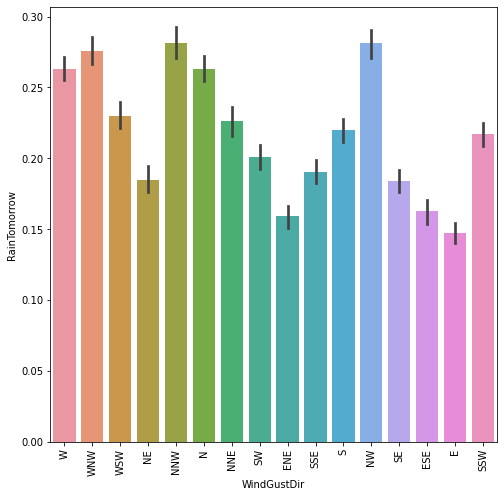

WindGustDir:
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


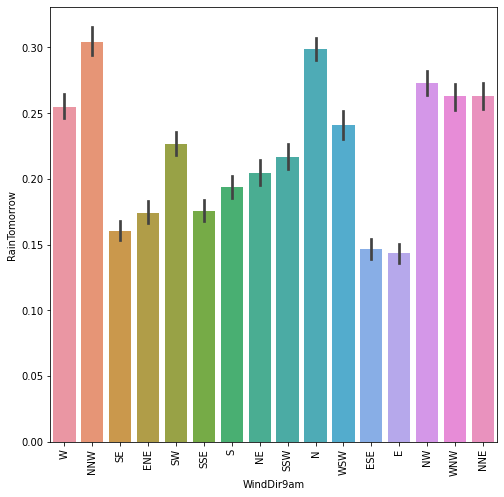

WindDir9am:
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64


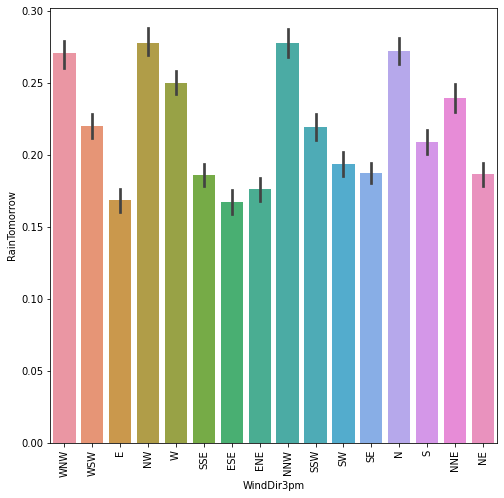

WindDir3pm:
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64


In [ ]:
for i in cat_cols:
    ctgplt(i, "RainTomorrow")

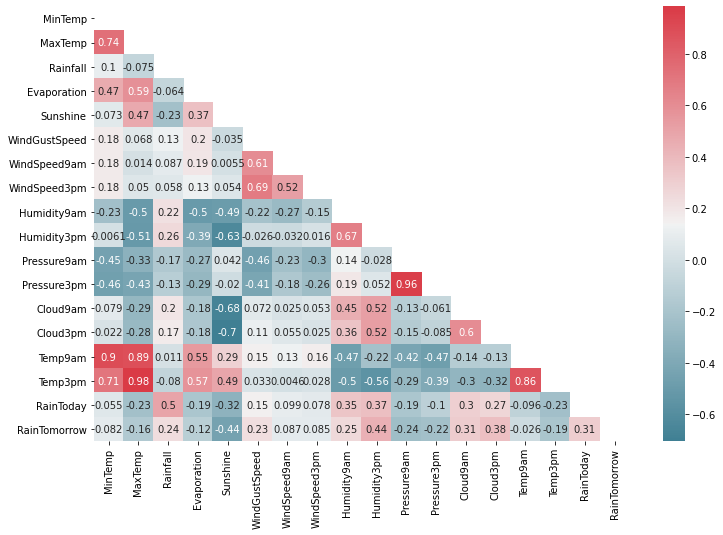

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

# Kesimpulan

Dengan melakukan eksplorasi data dengan menggunakan matplotlib.pyplot didapatkan visualisasi fitur Location dengan data target RainTomorrow. Dari visualisasi tersebut didapatkan hasil tertinggi berasal dari Portland. Jadi dapat disimpulkan bahwa Portland memiliki kemungkinan RainTomorrow terbesar daripada lokasi lainnya.


Dengan melakukan eksplorasi data dengan menggunakan matplotlib.pyplot didapatkan visualisasi fitur WindGustDir dengan data target RainTomorrow. Dari visualisasi tersebut didapatkan hasil tertinggi yaitu arah tiupan angin North Northwest dan Northwest. Jadi dapat disimpulkan bahwa kecenderungan angin yang mengarah ke northwest memiliki kemungkinan RainTomorrow terbesar daripada arah lainnya.
